# Import the modules and dataset

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import category_encoders as ce
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE


data = pd.read_csv("housing.csv")
print(data.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [8]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Exploratory analysis of the data

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    4 non-null      object
dtypes: object(1)
memory usage: 164.0+ bytes


In [7]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data cleaning

In [5]:
#Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 20
data = {
    'Student_ID': range(1, n_samples + 1),
    'Age': np.random.randint(18, 25, n_samples),  # Numerical, age of students
    'Score': np.random.gamma(2, 10, n_samples),  # Numerical, skewed scores
    'Attendance': np.linspace(70, 95, n_samples) + np.random.normal(0, 5, n_samples),  # Numerical, time-series-like
    'Grade': np.random.choice(['A', 'B', 'C', 'D'], n_samples)  # Categorical
}

# Create DataFrame
data = pd.DataFrame(data)
# Introduce missing values
# Random missingness in Age (10% missing)
data.loc[np.random.choice(data.index, 2), 'Age'] = np.nan
# Skewed missingness in Score (missing more for lower values)
data.loc[data['Score'] < 15, 'Score'] = np.nan
# Sequential missingness in Attendance (simulate gaps)
data.loc[5:7, 'Attendance'] = np.nan
# Random missingness in Grade
data.loc[np.random.choice(data.index, 2), 'Grade'] = np.nan

# Display the dataset with missing values
print("Dataset with Missing Values:")
print(data)

Dataset with Missing Values:
    Student_ID   Age      Score  Attendance Grade
0            1  24.0  16.955198   62.450214     D
1            2  21.0        NaN   74.923302     D
2            3  22.0  19.701232   68.414479     B
3            4  24.0        NaN   71.380741     C
4            5  20.0  36.018745   75.045474     C
5            6  22.0  15.350650         NaN     A
6            7  22.0        NaN         NaN     C
7            8  24.0  35.697829         NaN     A
8            9  19.0  28.885525   85.179238     C
9           10  20.0        NaN   85.230942   NaN
10          11  24.0        NaN   86.650096     C
11          12  20.0        NaN   85.341695     A
12          13  20.0        NaN   89.100896   NaN
13          14  22.0        NaN   88.310874     B
14          15   NaN        NaN   87.580027     C
15          16  20.0  37.474120   95.560685     C
16          17  23.0        NaN   89.823893     B
17          18  22.0  37.202974   88.520082     C
18          19  19.0 

In [6]:
#Filling missing values with the mean of the Column values
mean_imputation = data['Score'].fillna(data['Score'].mean())
# mean_imputation  

In [7]:
#Filling missing values with the median of the Column values
median_imputation = data['Attendance'].fillna(data['Attendance'].median())
# median_imputation


In [8]:
#Filling missing values with the mode of the Column values
mode_imputation = data['Grade'].fillna(data['Grade'].mode().iloc[0])
# mode_imputation


In [9]:
# Forward and Backward filling
forward_fill = data['Attendance'].fillna(method='ffill')
# forward_fill

C:\Users\Samar\AppData\Local\Temp\ipykernel_31360\2504269067.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_fill = data['Attendance'].fillna(method='ffill')


In [10]:
backward_fill = data['Score'].fillna(method='bfill')
# backward_fill

C:\Users\Samar\AppData\Local\Temp\ipykernel_31360\3153911004.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  backward_fill = data['Score'].fillna(method='bfill')


In [11]:
#Creating the IQR
Q1 = data['Attendance'].quantile(0.25)  # 25th percentile
Q3 = data['Attendance'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define outlier boundaries
max_limit = Q1 - 1.5 * IQR
min_limit = Q3 + 1.5 * IQR

#Setting threshold values in case of outliers
forward_fill_iqr = forward_fill.clip(lower=min_limit, upper=max_limit)
# forward_fill_iqr

In [12]:
#Creating a new dataset with the Imputated data
new_data = data.copy()
new_data['Mean_Score_Imp'] = mean_imputation
new_data['Med_Attn_Imp'] = median_imputation
new_data['Mod_Grade_Imp'] = mode_imputation

new_data['Fwd_Fill_Attn_Imp'] = forward_fill
new_data['Bwd_Fill_Score_Imp'] = backward_fill

new_data['Fwd_Fill_IQR'] = forward_fill_iqr
new_data[['Mean_Score_Imp', 'Med_Attn_Imp', 'Mod_Grade_Imp', 'Fwd_Fill_Attn_Imp', 'Bwd_Fill_Score_Imp', 'Fwd_Fill_IQR']]

,Mean_Score_Imp,Med_Attn_Imp,Mod_Grade_Imp,Fwd_Fill_Attn_Imp,Bwd_Fill_Score_Imp,Fwd_Fill_IQR
0,16.955198,62.450214,D,62.450214,16.955198,62.450214
1,29.570729,74.923302,D,74.923302,19.701232,74.923302
2,19.701232,68.414479,B,68.414479,19.701232,68.414479
3,29.570729,71.380741,C,71.380741,36.018745,71.380741
4,36.018745,75.045474,C,75.045474,36.018745,75.045474
5,15.350650,86.650096,A,75.045474,15.350650,75.045474
6,29.570729,86.650096,C,75.045474,35.697829,75.045474
7,35.697829,86.650096,A,75.045474,35.697829,75.045474
8,28.885525,85.179238,C,85.179238,28.885525,85.179238
9,29.570729,85.230942,C,85.230942,37.474120,85.230942


In [13]:
new_data[[
         'Attendance', 
         'Med_Attn_Imp', 
         'Fwd_Fill_Attn_Imp', 
         'Fwd_Fill_IQR'
         ]]

,Attendance,Med_Attn_Imp,Fwd_Fill_Attn_Imp,Fwd_Fill_IQR
0,62.450214,62.450214,62.450214,62.450214
1,74.923302,74.923302,74.923302,74.923302
2,68.414479,68.414479,68.414479,68.414479
3,71.380741,71.380741,71.380741,71.380741
4,75.045474,75.045474,75.045474,75.045474
5,NaN,86.650096,75.045474,75.045474
6,NaN,86.650096,75.045474,75.045474
7,NaN,86.650096,75.045474,75.045474
8,85.179238,85.179238,85.179238,85.179238
9,85.230942,85.230942,85.230942,85.230942


In [14]:
new_data[[
    'Score',
    'Mean_Score_Imp',
    'Bwd_Fill_Score_Imp'
]]

,Score,Mean_Score_Imp,Bwd_Fill_Score_Imp
0,16.955198,16.955198,16.955198
1,NaN,29.570729,19.701232
2,19.701232,19.701232,19.701232
3,NaN,29.570729,36.018745
4,36.018745,36.018745,36.018745
5,15.350650,15.350650,15.350650
6,NaN,29.570729,35.697829
7,35.697829,35.697829,35.697829
8,28.885525,28.885525,28.885525
9,NaN,29.570729,37.474120


In [15]:
new_data[[
    'Grade',
    'Mod_Grade_Imp'
]]

,Grade,Mod_Grade_Imp
0,D,D
1,D,D
2,B,B
3,C,C
4,C,C
5,A,A
6,C,C
7,A,A
8,C,C
9,NaN,C


# Feature Scaling

In [16]:
#Scaling the Mean Imputed SCORE and Median Imputed ATTENDANCE features 
scaler = MinMaxScaler() 
scaled_FFAI = scaler.fit_transform(new_data[['Mean_Score_Imp','Med_Attn_Imp']])
# data['scaled_FFAI']
scaled_FFAI

array([[0.04897075, 0.        ],
       [0.43399618, 0.32215825],
       [0.13277957, 0.15404665],
       [0.43399618, 0.23066006],
       [0.63078934, 0.32531375],
       [0.        , 0.62504103],
       [0.43399618, 0.62504103],
       [0.62099497, 0.62504103],
       [0.41308378, 0.58705131],
       [0.43399618, 0.58838674],
       [0.43399618, 0.62504103],
       [0.43399618, 0.59124728],
       [0.43399618, 0.68834095],
       [0.43399618, 0.66793604],
       [0.43399618, 0.64905954],
       [0.6752073 , 0.85518611],
       [0.43399618, 0.70701471],
       [0.66693195, 0.67333953],
       [0.15120413, 0.96326157],
       [1.        , 1.        ]])

In [17]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(new_data[['Mean_Score_Imp','Med_Attn_Imp']])
standardized_data

array([[-1.70975928, -2.32189127],
       [ 0.        , -1.02135123],
       [-1.33759449, -1.70001108],
       [ 0.        , -1.3907258 ],
       [ 0.87388755, -1.00861263],
       [-1.92722074,  0.20137446],
       [ 0.        ,  0.20137446],
       [ 0.83039431,  0.20137446],
       [-0.09286445,  0.04801148],
       [ 0.        ,  0.05340259],
       [ 0.        ,  0.20137446],
       [ 0.        ,  0.06495047],
       [ 0.        ,  0.45691373],
       [ 0.        ,  0.37453993],
       [ 0.        ,  0.29833623],
       [ 1.07113171,  1.13046098],
       [ 0.        ,  0.53229894],
       [ 1.03438387,  0.39635359],
       [-1.25577764,  1.56675732],
       [ 2.51341915,  1.71506891]])

# Encoding Categorical Data

In [35]:
data=pd.DataFrame({'City':['Red', 'Blue', 'Green', 'Red']})

#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols='City',
                         handle_unknown='return_nan',
                         return_df=True,
                         use_cat_names=True)

#Original Data
data

,City
0,Red
1,Blue
2,Green
3,Red


In [19]:
#Fit and transform Data
data_encoded = encoder.fit_transform(data)
data_encoded

,City_Red,City_Blue,City_Green
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0


In [20]:
#Label encoding
df = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue']})
encoder = LabelEncoder()
df['Color_encoded'] = encoder.fit_transform(df['Color'])
print(df)

   Color  Color_encoded
0    Red              2
1   Blue              0
2  Green              1
3    Red              2
4   Blue              0


# Feature Engineering

In [37]:
#Feature extraction: A feature is split into multiple features - Date is 
# broken down to Day, Month and Year)
data1 = pd.DataFrame({'Date': pd.to_datetime(['2025-01-01', '2025-02-14', '2025-03-20'])})
data1['Day'] = data1['Date'].dt.day
data1['Month'] = data1['Date'].dt.month
data1['Year'] = data1['Date'].dt.year
print(data1)
print("="*50)
#Using 2 features to create a new one - Using Total price and square footage
# of a house to get the Price per square foot which is a standardize 
# feature thats better for comparison
data2 = pd.DataFrame({'TotalPrice': [300000, 450000, 600000],
                   'SquareFootage': [1500, 2000, 2500]})
data2['PricePerSqFt'] = data2['TotalPrice'] / data2['SquareFootage']
print(data2)

        Date  Day  Month  Year
0 2025-01-01    1      1  2025
1 2025-02-14   14      2  2025
2 2025-03-20   20      3  2025
   TotalPrice  SquareFootage  PricePerSqFt
0      300000           1500         200.0
1      450000           2000         225.0
2      600000           2500         240.0


# Exploratory data analysis

In [41]:
# Loading the Iris dataset in seaborn
data = sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


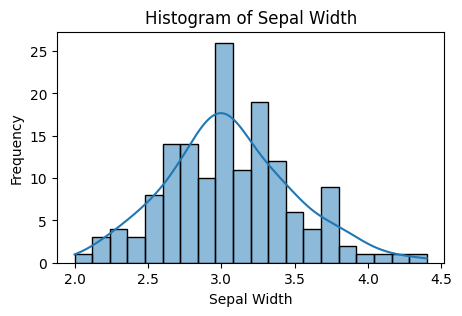

In [23]:
#Histogram
plt.figure(figsize=(5, 3))
sns.histplot(data['sepal_width'], bins=20, kde=True)  # kde = density curve
plt.title('Histogram of Sepal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.show()

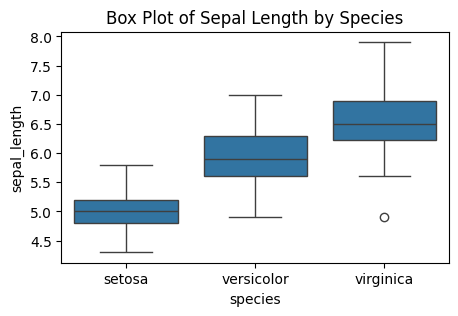

In [24]:
#Box plot
plt.figure(figsize=(5, 3))
sns.boxplot(x='species', y='sepal_length', data=data)
plt.title('Box Plot of Sepal Length by Species')
plt.show()

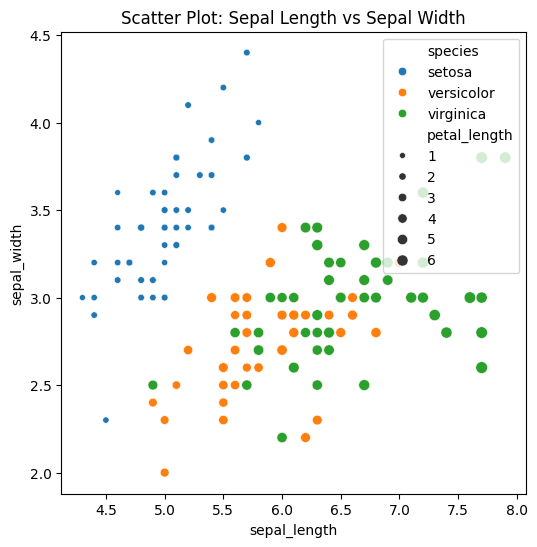

In [25]:
#Scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', size='petal_length', data=data)
plt.title('Scatter Plot: Sepal Length vs Sepal Width')
plt.show()

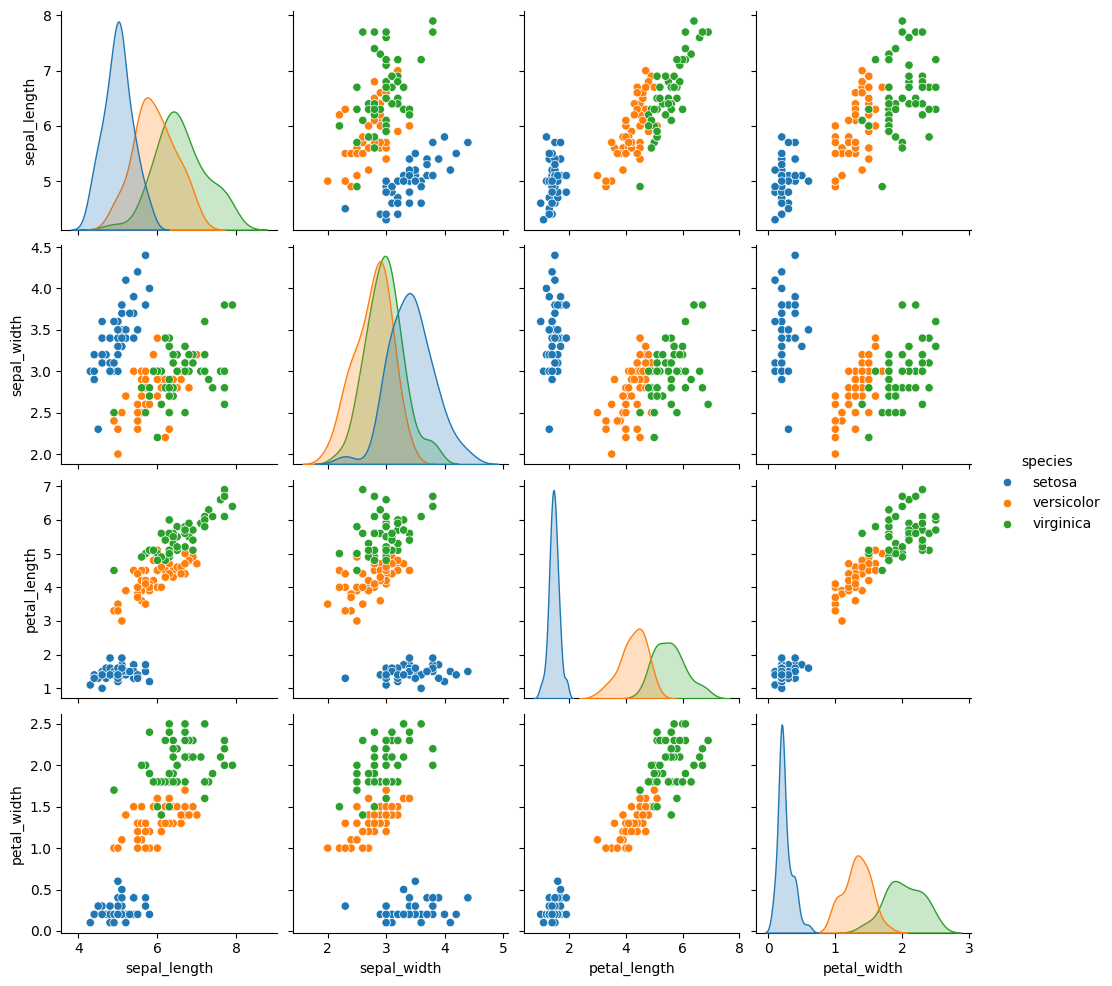

In [26]:
#Pair plot
sns.pairplot(data, hue='species')
plt.show()

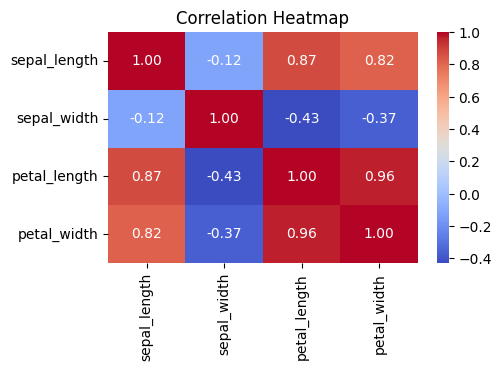

In [27]:
#Correlation heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(data[["sepal_length","sepal_width","petal_length","petal_width"]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Splitting data

In [28]:
# get the locations
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# split the dataset
X = data[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = data[["species"]]
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.05, random_state=None)

print("Shape of original dataset: ", data.shape)
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_train: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of original dataset:  (150, 5)
Shape of X_train:  (142, 4)
Shape of y_train:  (142, 1)
Shape of X_train:  (8, 4)
Shape of y_test:  (8, 1)


In [29]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
42,4.4,3.2,1.3,0.2
103,6.3,2.9,5.6,1.8
46,5.1,3.8,1.6,0.2
21,5.1,3.7,1.5,0.4
143,6.8,3.2,5.9,2.3
...,...,...,...,...
131,7.9,3.8,6.4,2.0
148,6.2,3.4,5.4,2.3
51,6.4,3.2,4.5,1.5
95,5.7,3.0,4.2,1.2


In [30]:
y_train

,species
42,setosa
103,virginica
46,setosa
21,setosa
143,virginica
...,...
131,virginica
148,virginica
51,versicolor
95,versicolor


In [31]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
9,4.9,3.1,1.5,0.1
20,5.4,3.4,1.7,0.2
141,6.9,3.1,5.1,2.3
13,4.3,3.0,1.1,0.1
75,6.6,3.0,4.4,1.4
14,5.8,4.0,1.2,0.2
48,5.3,3.7,1.5,0.2
100,6.3,3.3,6.0,2.5


In [32]:
y_test

,species
9,setosa
20,setosa
141,virginica
13,setosa
75,versicolor
14,setosa
48,setosa
100,virginica


# Handling imbalance

In [43]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the data: Assuming there is a dataset X 
# and its results y. The X dataset contains features Feature1 and Feature2
X_new, y_new = smote.fit_resample(X_train, y_train)

# Convert to DataFrame
data_new = pd.DataFrame(X_new, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
data_new['species'] = y_new

# Check new class distribution
print("Class distribution before SMOTE:")
print(y_train['species'].value_counts())
print("="*50)
print("Class distribution after SMOTE:")
print(data_new['species'].value_counts())

Class distribution before SMOTE:
species
versicolor    49
virginica     48
setosa        45
Name: count, dtype: int64
Class distribution after SMOTE:
species
setosa        49
virginica     49
versicolor    49
Name: count, dtype: int64
